In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.0-preview2/spark-3.0.0-preview2-bin-hadoop2.7.tgz
!tar -xvf spark-3.0.0-preview2-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-preview2-bin-hadoop2.7"
import findspark
findspark.init()

spark-3.0.0-preview2-bin-hadoop2.7/
spark-3.0.0-preview2-bin-hadoop2.7/data/
spark-3.0.0-preview2-bin-hadoop2.7/data/streaming/
spark-3.0.0-preview2-bin-hadoop2.7/data/streaming/AFINN-111.txt
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/sample_binary_classification_data.txt
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/sample_kmeans_data.txt
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/sample_multiclass_classification_data.txt
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/sample_lda_libsvm_data.txt
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/iris_libsvm.txt
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/pagerank_data.txt
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/sample_linear_regression_data.txt
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/pic_data.txt
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/als/
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/als/test.data
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/als/sample_movielens_rati

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt

In [0]:
spark = SparkSession.builder.getOrCreate()

In [55]:
train = spark.read.option("inferSchema", "true").csv("BearTraining.csv", header=True)

train = train.select("Front Claws", "Pupillary Distance", "Ear Shape")

train = train.na.drop()

train = train.withColumn("Ear Shape", when(train['Ear Shape'] == 'Rounded', 0)
                         .when(train['Ear Shape'] == 'Broad', 1)
                         .when(train['Ear Shape'] == 'Pointed', 2))

cols = train.columns
train = VectorAssembler(inputCols = cols, outputCol = "Vector").transform(train)

scaler = StandardScaler(inputCol = "Vector", outputCol = "features")
train = scaler.fit(train).transform(train)

train.show()

+-----------+------------------+---------+--------------+--------------------+
|Front Claws|Pupillary Distance|Ear Shape|        Vector|            features|
+-----------+------------------+---------+--------------+--------------------+
|        9.0|              12.0|        0|[9.0,12.0,0.0]|[3.64064500943049...|
|        9.6|              10.7|        1|[9.6,10.7,1.0]|[3.88335467672585...|
|        1.4|              15.1|        1|[1.4,15.1,1.0]|[0.56632255702252...|
|        5.4|              12.3|        1|[5.4,12.3,1.0]|[2.18438700565829...|
|        3.5|               9.0|        2| [3.5,9.0,2.0]|[1.41580639255630...|
|        2.6|               9.7|        2| [2.6,9.7,2.0]|[1.05174189161325...|
|        7.9|              16.3|        1|[7.9,16.3,1.0]|[3.19567728605565...|
|        4.6|              12.7|        1|[4.6,12.7,1.0]|[1.86077411593114...|
|        5.0|               9.2|        1| [5.0,9.2,1.0]|[2.02258056079471...|
|        3.8|              15.7|        0|[3.8,15.7,

In [56]:
test = spark.read.option("inferSchema", "true").csv("BearTesting.csv", header=True)

test = test.select("Front Claws", "Pupillary Distance", "Ear Shape", "Grizzly")

test = test.na.drop()

test = test.withColumn("Ear Shape", when(test['Ear Shape'] == 'Rounded', 0)
                         .when(test['Ear Shape'] == 'Broad', 1)
                         .when(test['Ear Shape'] == 'Pointed', 2))

test = test.withColumn("Grizzly", when(test['Grizzly'] == 'Yes', 0)
                         .when(test['Grizzly'] == 'No', 1))

cols = test.columns
cols.remove("Grizzly")
test = VectorAssembler(inputCols = cols, outputCol = "Vector").transform(test)

scaler = StandardScaler(inputCol = "Vector", outputCol = "features")
test = scaler.fit(test).transform(test)

test.show()

+-----------+------------------+---------+-------+--------------+--------------------+
|Front Claws|Pupillary Distance|Ear Shape|Grizzly|        Vector|            features|
+-----------+------------------+---------+-------+--------------+--------------------+
|        3.7|              11.3|        0|      1|[3.7,11.3,0.0]|[1.49191519757039...|
|        7.8|              12.0|        0|      0|[7.8,12.0,0.0]|[3.14511852460785...|
|        5.1|              11.1|        1|      0|[5.1,11.1,1.0]|[2.05642365070513...|
|        9.1|              11.8|        2|      1|[9.1,11.8,2.0]|[3.66930494537583...|
|        4.6|              12.4|        1|      1|[4.6,12.4,1.0]|[1.85481348887129...|
|        2.9|              10.4|        1|      1|[2.9,10.4,1.0]|[1.16933893863625...|
|        4.9|              11.3|        1|      1|[4.9,11.3,1.0]|[1.97577958597160...|
|        3.1|              10.7|        1|      1|[3.1,10.7,1.0]|[1.24998300336978...|
|        1.7|               9.4|        0| 

In [0]:
kmeans = KMeans().setK(2)
model = kmeans.fit(train)

In [0]:
prediction = prediction.toPandas()

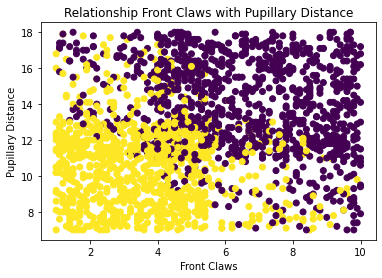

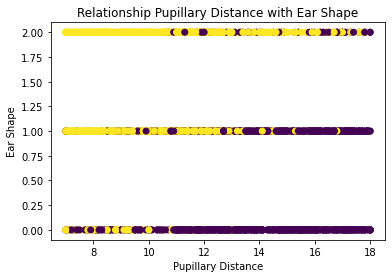

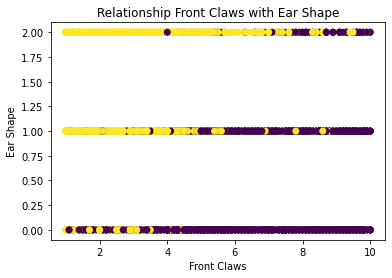

In [70]:
fig = plt.figure()
vs = fig.add_subplot(111)
vs.set_title("Relationship Front Claws with Pupillary Distance")
plt.scatter(prediction['Front Claws'], prediction['Pupillary Distance'], c=prediction['prediction'])
plt.xlabel('Front Claws')
plt.ylabel('Pupillary Distance')
plt.show()

fig = plt.figure()
vs = fig.add_subplot(111)
vs.set_title("Relationship Pupillary Distance with Ear Shape")
plt.scatter(prediction['Pupillary Distance'], prediction['Ear Shape'], c=prediction['prediction'])
plt.xlabel('Pupillary Distance')
plt.ylabel('Ear Shape')
plt.show()

fig = plt.figure()
vs = fig.add_subplot(111)
vs.set_title("Relationship Front Claws with Ear Shape")
plt.scatter(prediction['Front Claws'], prediction['Ear Shape'], c=prediction['prediction'])
plt.xlabel('Front Claws')
plt.ylabel('Ear Shape')
plt.show()

In [68]:
i = 0

for index, row in prediction.iterrows():
    if row ['Grizzly'] == row ['prediction']:
      i += 1

print ("Accuracy: ", (i/len(prediction)) * 100)

Accuracy:  83.55
